# Titanic Disaster: Data Analysis

## 1. Introduction


The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others. In this project, we will attempt to get some insights on a few such factors.

### 1.1 Project Objective

In this project, we will do an analysis of what sort of passengers were able to survive and what's the age/family distribution of passengers of different class. Specifically, we will endeavour to  answer the following quesions:

 * What factors are related to survival chances?
     * Which age group had the maximum chances of survival?
     * Do class and sex influence the chances of survival?
     * Do passengers travelling alone have lesser chances of survival compared to passengers travelling with family?
 * What pattern can we see in the passenger class?
     * Are upper class passengers relatively older than passengers from other classes?
     * How does the class vary between passengers embarking from different ports? 
       

### 1.2 Dataset

The dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. Following is the description of this dataset. These details can also be found on the Kaggle website (https://www.kaggle.com/c/titanic/data), where the data was obtained.

```
VARIABLE DESCRIPTIONS:
PassengerId     Unique idntification number for a passenger
Survived        Survival
                (0 = No; 1 = Yes)
Pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
Name            Name
Sex             Sex
Age             Age
SibSp           Number of Siblings/Spouses Aboard
Parch           Number of Parents/Children Aboard
Ticket          Ticket Number
Fare            Passenger Fare
Cabin           Cabin
Embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```


## 2. Data Exploration and Analysis

First, we load all of the packages and functions that we'll be using in our analysis by running the first code cell below.

In [21]:
# import all necessary packages and functions.
import numpy as np
import pandas as pd
from IPython.display import display
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


The first step is to look at the structure of the dataset to see if there's any data wrangling we should perform. The below cell will read in the Titanic data file and print out the first few rows of the table.

In [3]:
#Load data from csv to a pandas df
titanic_data = pd.read_csv("./titanic-data.csv")

display(titanic_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In this exploration, we're going to concentrate on factors in the Titanic data that affect the Survival chances of passengers. We will focus down on the following columns:

   * Survived
   * Pclass
   * Sex
   * Age
   * SibSp
   * Parch
   * Embarked
   
We will also add two columns: 1) AgeGroup to classify passengers based their age as described below:

|Age Group|Description|
|--|-------------------------------|
|Children|Passengers below 19 years of age|
|Young Adults|Passengers whose age is between 19 and 35 - both inclusive|
|Middle-aged Adults|Passengers whose age is between 36 and 55 - both inclusive|
|Older Adults|Passengers above 55 years of age|

and 2) FamilyType to signify if the passenger was travelling alone or with the family.  A passenger is considered travelling alone if his/her "SibSp" and "Parch" field values are 0.

In [23]:
# Function that returns the age group of a person per the table listed above based on his/her age
def getAgeGroup(age):
    if str(age) == "":
        return None
    elif age < 19:
        return "Children"
    elif age < 36:
        return "Young Adults"
    elif age < 56:
        return "Middle-aged Adults"
    else:
        return "Older Adults"

# Function that returns Family Type of a person baed on count of family members
def getFamilyType(count_of_members):
    if str(count_of_members) == "" or count_of_members == 0:
        return "Solitary Passenger"
    else:
        return "Family Passenger"

# Create a subset of fields discibed above
titanic_subset_data = titanic_data[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]]

# Add a new field AgeGroup in the titanic_subset_data df and populate this column using getAgeGroup function
titanic_subset_data.loc[:, "AgeGroup"] =  pd.Series(titanic_subset_data["Age"].apply(getAgeGroup), 
                                                 index=titanic_subset_data.index)

# Add a new field FamilyType in the titanic_subset_data df and populate this column using getFamilyType function
titanic_subset_data.loc[:, "FamilyType"] =  pd.Series((titanic_subset_data["SibSp"] + 
                                                    titanic_subset_data["Parch"]).apply(getFamilyType), 
                                                    index=titanic_subset_data.index)
# Display a sample output of this data
display(titanic_subset_data.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,FamilyType
0,0,3,male,22.0,1,0,S,Young Adults,Family Passenger
1,1,1,female,38.0,1,0,C,Middle-aged Adults,Family Passenger
2,1,3,female,26.0,0,0,S,Young Adults,Solitary Passenger
3,1,1,female,35.0,1,0,S,Young Adults,Family Passenger
4,0,3,male,35.0,0,0,S,Young Adults,Solitary Passenger


We see that the two additional columns AgeGroup and FamilyType have been populated based on the classification functions we had defined. We now have a condensed dataframe for data analysis. Let's view summary statistics for this dataset.

In [19]:
# Display summary stats 
display(titanic_subset_data.describe())

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000
50%,0.000000,3.000000,NaN,0.000000,0.000000
75%,1.000000,3.000000,NaN,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


The summary matches the count of 891 records with about 38% of people surviving the shipwreck. We also see that for approximately 20% of passengers, we do not know the age.

Let's plot the distribution of some of the variables:

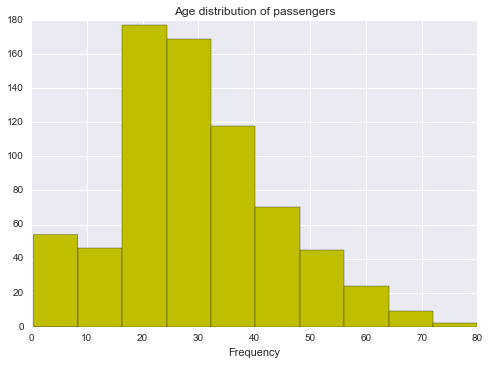

In [6]:
# frequency distribution of passenger age

plt.hist(titanic_subset_data.loc[:, "Age"].dropna(), color="y")
plt.xlabel("Age")
plt.xlabel("Frequency")
plt.title("Age distribution of passengers")

The age distribution of passengers seems approximately normal with maximum frequency in 20's.

We will now view distribution of categorical variables Class and Sex

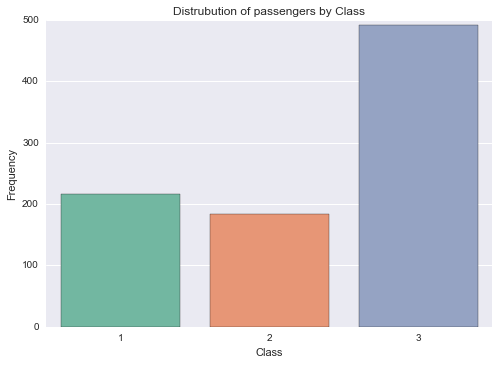

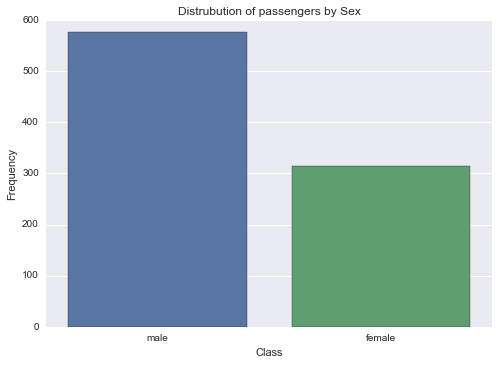

In [7]:
sns.set(style="darkgrid")

# Distribution of Class 
ax = sns.countplot(x="Pclass", data=titanic_subset_data, palette="Set2")
ax.set(xlabel='Class',ylabel='Frequency', title = "Distrubution of passengers by Class")
sns.plt.show()

# Distribution of Sex 
ax = sns.countplot(x="Sex", data=titanic_subset_data)
ax.set(xlabel='Class',ylabel='Frequency', title = "Distrubution of passengers by Sex")
sns.plt.show()

From these two plots, we can conclude that more than half of the passengers (55%) onboard belonged to lower class. Similarly, almost two-third of the passengers (65%) where male.

We will now proceed to analyse this data to answer each of the questions in Section 1.1.

###  2.1 What factors are related to survival chances?

   #### 2.1.1 Which age group had the maximum chances of survival?

We saw that there were 177 passengers for whom we don't have the age information. We can impute these missing values using the mean or median age for each sex or apply a regression model to simulate the value. However, for this project, we will remove these missing age passengers records and work with the other 80% of the dataset (which is substantial) to answer the questions related to age.

In [8]:
# Remove rows which have no age data
titanic_subset_data_with_valid_age = titanic_subset_data[titanic_subset_data["Age"].notnull()]

Let's plot the survival information for each age group of passengers

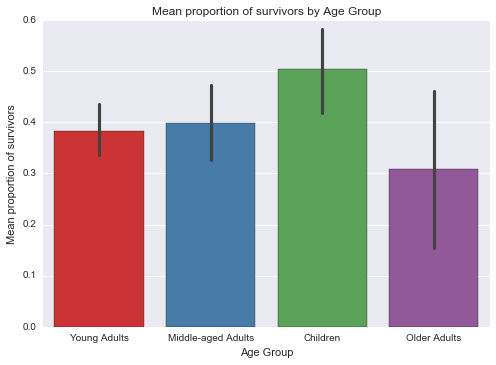

In [9]:
# barplot to visualize mean survival proportion by age group

sns.set(style="darkgrid")
ax = sns.barplot(data=titanic_subset_data_with_valid_age,x="AgeGroup",y="Survived", palette="Set1")
ax.set(xlabel='Age Group',ylabel='Mean proportion of survivors', title = "Mean proportion of survivors by Age Group")
sns.plt.show()

As is seen from the above plot, children seem to have had the maximum survival proportion with approximately 50% of them surviving. Older adults group have had the maximum casualities. It could be possible that the rescue of children was given priority over others. It is also possible that the older adults were relatively less agile to be able to survive the tragedy.

   #### 2.1.2 How do class and sex figure in the chances of survival?

Let's now plot the distribution of survivors by Class and Sex to see if we can draw any insights.

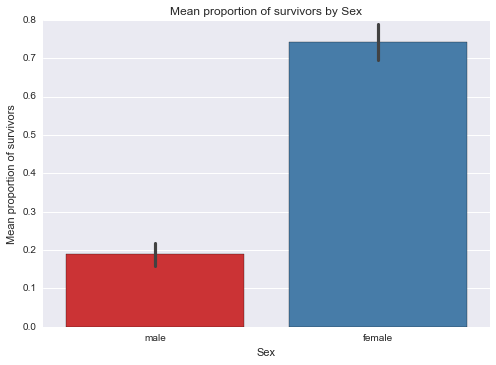

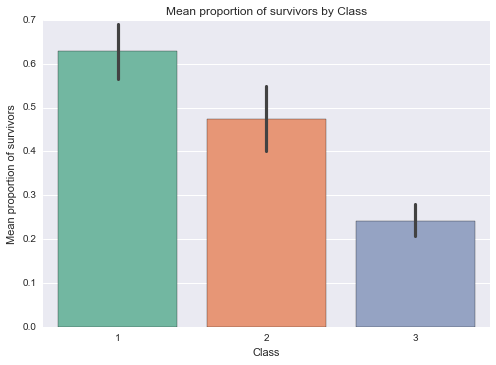

In [10]:
# barplot to visualize mean survival proportion by Sex
ax = sns.barplot(data=titanic_subset_data,x="Sex",y="Survived", palette="Set1")
ax.set(xlabel='Sex',ylabel='Mean proportion of survivors', title = "Mean proportion of survivors by Sex")
sns.plt.show()

# barplot to visualize mean survival proportion by Class
ax = sns.barplot(data=titanic_subset_data,x="Pclass",y="Survived", palette="Set2")
ax.set(xlabel='Class',ylabel='Mean proportion of survivors', title = "Mean proportion of survivors by Class")
sns.plt.show()

It is evident from the above two plots that females and upper class passengers have had a compartiviely high proportion of survival rates with former close to 75% and the later group close tp 63% of mean survivors. Like children, it is highly likely that women and upper class passengers were given priority in the rescue operations.

   #### 2.1.3 Do passengers travelling alone have lesser chances of survival compared to passengers travelling with family?

Let's plot the survival data based on the FamilyType classification

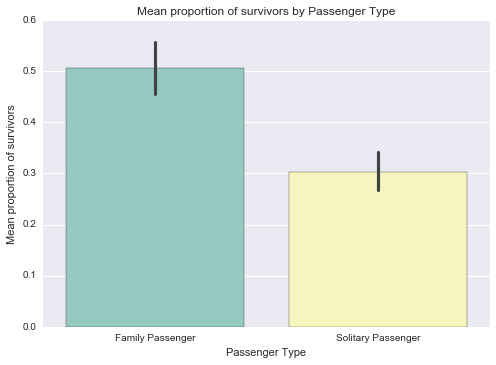

In [11]:
# barplot to visualize mean survival proportion by Class
ax = sns.barplot(data=titanic_subset_data,x="FamilyType",y="Survived", palette="Set3")
ax.set(xlabel='Passenger Type',ylabel='Mean proportion of survivors', 
             title = "Mean proportion of survivors by Passenger Type")
sns.plt.show()

The plot clearly shows that family passengers have a significantly higher percentage of survival (~51%) compared to Solitary Passengers (~30%). We saw earlier that women and children might have been prioritoizedin the rescue operation. It is possible that many of them (especially children) were travelling with their family and hence the family passengers proportion of survival is higher.

###  2.2 What pattern can we see in the passenger class?

   #### 2.2.1 Are upper class passengers relatively older than passengers from other classes?

We will compare the age with class to answer this question

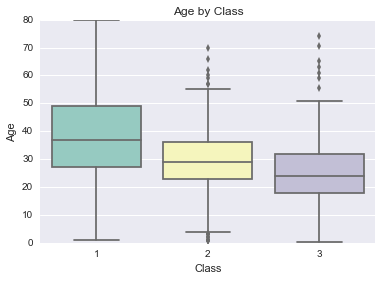

In [24]:
# barplot to visualize median age by Class
ax = sns.boxplot(titanic_subset_data_with_valid_age["Age"], 
                       groupby = titanic_subset_data_with_valid_age["Pclass"], palette="Set3")
ax.set(xlabel='Class',ylabel='Age', title = "Age by Class")
sns.plt.show()

The above plot does suggest that the median age of upper class passengers is higher than that of the other two classes and in general the median age increases with class (lower to upper).

   #### 2.2.2 How does the class vary between passengers embarking from different ports? 

Let's drop the records for which Port of Embarking is not available. There are only 2 records hence this will not have a significant impact on our analysis.-


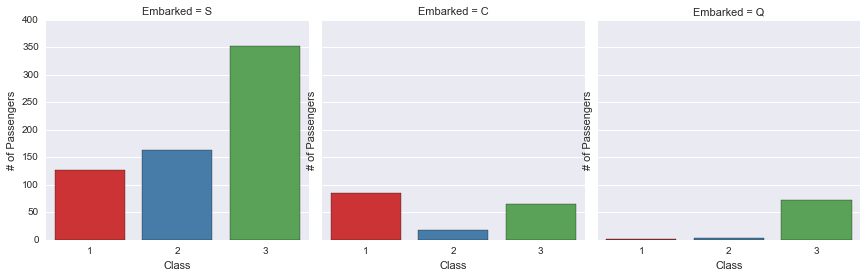

In [13]:
# drop records that do not have Embarked information
titanic_subset_data_with_valid_embarking_port = titanic_subset_data[titanic_subset_data["Embarked"].notnull()]

# factorplot to visualize number of pasengers embarking from each port across Classes
ax = sns.factorplot(data = titanic_subset_data_with_valid_embarking_port, 
                          x="Pclass", col="Embarked", kind="count", palette="Set1")  
ax.set(xlabel='Class',ylabel='# of Passengers')
sns.plt.show()


The above plots indicate that we have signficantly higher proportion of 1st Class passengers embarking from Cherbourg (Embarked = C) as compared to Queenstown and Southampton which have predominantly 3rd class passengers embarking from these ports.

## 3. Conclusion

We have analyzed the titanic data on a number of variable(s), on a combination of factors and have made some observations. Given we have worked with limited set of data and information, it is important to understand that the inferences and correlation drawn need not necessarily be accurate as there could be other factors incluencing the variables.